In [1]:
%run utils.py
%matplotlib inline
import os.path as osp
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotnine as pn
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv(osp.join(DATA_DIR, 'pubmed_ordered_proteins.csv'))
df.head()

,pr_value_lbl,pm_max_rel,panel_names,cell_types,panel_name_ct,cell_type_ct
0,CD3,0.022312,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,NaN,20,0
1,CD8,0.151769,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,TC0|TC9|TRM|TREG,19,4
2,CD4,0.129559,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,TH1|TREG|TREG1|TH17|TC0|TFH|TFH0LIKE|TH3|γδT-V...,18,10
3,CD45RA,0.006269,OMIP:016|OMIP:021|OMIP:024|OMIP:025|OMIP:030|O...,NaN,11,0
4,CD197,0.007523,OMIP:021|OMIP:022|OMIP:024|OMIP:025|OMIP:030|O...,NaN,10,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 6 columns):
pr_value_lbl     5150 non-null object
pm_max_rel       5147 non-null float64
panel_names      110 non-null object
cell_types       238 non-null object
panel_name_ct    5150 non-null int64
cell_type_ct     5150 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 241.5+ KB


In [79]:
df.sort_values(['panel_name_ct', 'pm_max_rel'], ascending=False).head(10)

,pr_value_lbl,pm_max_rel,panel_names,cell_types,panel_name_ct,cell_type_ct
0,CD3,0.022312,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,NaN,20,0
1,CD8,0.151769,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,TC0|TC9|TRM|TREG,19,4
2,CD4,0.129559,OMIP:014|OMIP:016|OMIP:023|OMIP:021|OMIP:022|O...,TH1|TREG|TREG1|TH17|TC0|TFH|TFH0LIKE|TH3|γδT-V...,18,10
3,CD45RA,0.006269,OMIP:016|OMIP:021|OMIP:024|OMIP:025|OMIP:030|O...,NaN,11,0
4,CD197,0.007523,OMIP:021|OMIP:022|OMIP:024|OMIP:025|OMIP:030|O...,NaN,10,0
6,IFNγ,0.364544,OMIP:014|OMIP:016|OMIP:025|OMIP:035|CYTOF:FR-F...,TC0|TH1|TFH0LIKE|γδT-Vγ9Vδ2|γδT-17|γδT-Vδ1,9,6
7,CD38,0.025864,OMIP:023|OMIP:024|OMIP:030|CYTOF:FR-FCM-ZZTJ|C...,NaN,9,0
5,CD56,0.013373,OMIP:024|OMIP:025|OMIP:028|OMIP:035|OMIP:037|C...,NKT,9,1
11,IL2,0.038572,OMIP:014|OMIP:016|OMIP:022|OMIP:025|CYTOF:FR-F...,TFH0LIKE|γδT-Vγ9,8,2
8,TNFα,0.017992,OMIP:014|OMIP:016|OMIP:025|CYTOF:FR-FCM-ZZTJ|C...,γδT-Vγ9,8,1


In [80]:
df_pl = df[df['panel_name_ct'] > 0]
print('Number of markers in a panel:', len(df_pl))
df_pl['pr_value_lbl'].unique()

Number of markers in a panel: 110


array(['CD3', 'CD8', 'CD4', 'CD45RA', 'CD197', 'CD56', 'IFNγ', 'CD38',
       'TNFα', 'CD45', 'CD19', 'IL2', 'CD154', 'CD14', 'CD16', 'CD127',
       'HLADR', 'CD25', 'CD107A', 'CD279', 'TCRγδ', 'CD185', 'KI67',
       'CD57', 'CD27', 'CD161', 'IL4', 'CD194', 'CD152', 'CX3CR1',
       'CD196', 'CD184', 'CD69', 'IL22', 'IL17A', 'CD183', 'CD20', 'CD31',
       'CD45RO', 'CD40', 'CD15', 'TNF', 'CD7', 'CDW199', 'CXCL8', 'IL10',
       'CSF2', 'Vδ2', 'IgG', 'IgD', 'CD366', 'IgA', 'CD103', 'MIP1β',
       'CD192', 'GRZB', 'CCR10', 'CD11C', 'CD272', 'CD26', 'CD21',
       'CD278', 'CD28', 'CD160', 'COLLAGENIV', 'KLRG1', 'IFNα', 'CD2',
       'CD137', 'CD141', 'IL17F', 'CD335', 'Vα7.2', 'Vδ1', 'CD195',
       'SIRPα', 'CD186', 'IL21', 'IgM', 'CD159A', 'CD163', 'CD22', 'CD8β',
       'CD95', 'CD104', 'CD328', 'CD29', 'TIGIT', 'CD49A', 'CD49D', 'CD1',
       'CD10', 'CD62L', 'CD11B', 'CD90', 'CD223', 'CD80', 'CD85', 'CD85K',
       'CD86', 'CD123', 'CD34', 'CD9', 'CD337', 'TCR', 'IL5', 'IL9',
  

In [81]:
df_pl['pm_max_rel'].notnull().value_counts()

True     107
False      3
Name: pm_max_rel, dtype: int64

In [82]:
df_pl[df_pl['pm_max_rel'].isnull()]

,pr_value_lbl,pm_max_rel,panel_names,cell_types,panel_name_ct,cell_type_ct
84,CD104,NaN,CODEX:H01,NaN,1,0
107,CYTOKERATIN,NaN,CODEX:H01,NaN,1,0
108,PODOPLANIN,NaN,CODEX:H01,NaN,1,0


## Panel Presence

In [83]:
df_pl_hm = (
    df_pl['panel_names'].str.split('|', expand=True)
    .assign(pr_value_lbl=df_pl['pr_value_lbl'].values)
    .rename_axis('idx', axis=1)
    .set_index('pr_value_lbl').stack().rename('panel')
    .reset_index()
    .pivot_table(index='pr_value_lbl', columns='panel', values='idx')
    .notnull().astype(int)
   .loc[lambda df: df.sum(axis=1).sort_values(ascending=False).index.values]
)
assert df_pl_hm.sum(axis=1).min() > 0
df_pl_hm.head()

panel,CODEX:H01,CYTOF:FR-FCM-ZZTJ,CYTOF:FR-FCM-ZZTM,OMIP:014,OMIP:016,OMIP:021,OMIP:022,OMIP:023,OMIP:024,OMIP:025,OMIP:028,OMIP:030,OMIP:035,OMIP:036,OMIP:037,OMIP:039,OMIP:040,OMIP:043,OMIP:044,OMIP:047
pr_value_lbl,,,,,,,,,,,,,,,,,,,,
CD3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0
CD8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0
CD4,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0
CD197,0,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1
CD56,0,1,1,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,1,0


In [85]:
df_pl_hm.stack().reset_index()['panel'].value_counts()

CODEX:H01            110
OMIP:030             110
OMIP:044             110
OMIP:036             110
OMIP:025             110
CYTOF:FR-FCM-ZZTM    110
OMIP:028             110
OMIP:043             110
OMIP:021             110
OMIP:035             110
OMIP:016             110
OMIP:024             110
OMIP:040             110
OMIP:023             110
OMIP:047             110
OMIP:039             110
OMIP:037             110
CYTOF:FR-FCM-ZZTJ    110
OMIP:014             110
OMIP:022             110
Name: panel, dtype: int64

OMIP Panel Summary:
- 23 datasets are available in FlowRepository when searching "OMIP"
- 22 actually start with "OMIP-0NN"
- 2 have no parameter names (just channels) and OMIP 16 has 4 associated datasets meaning that results should contain 17 panels

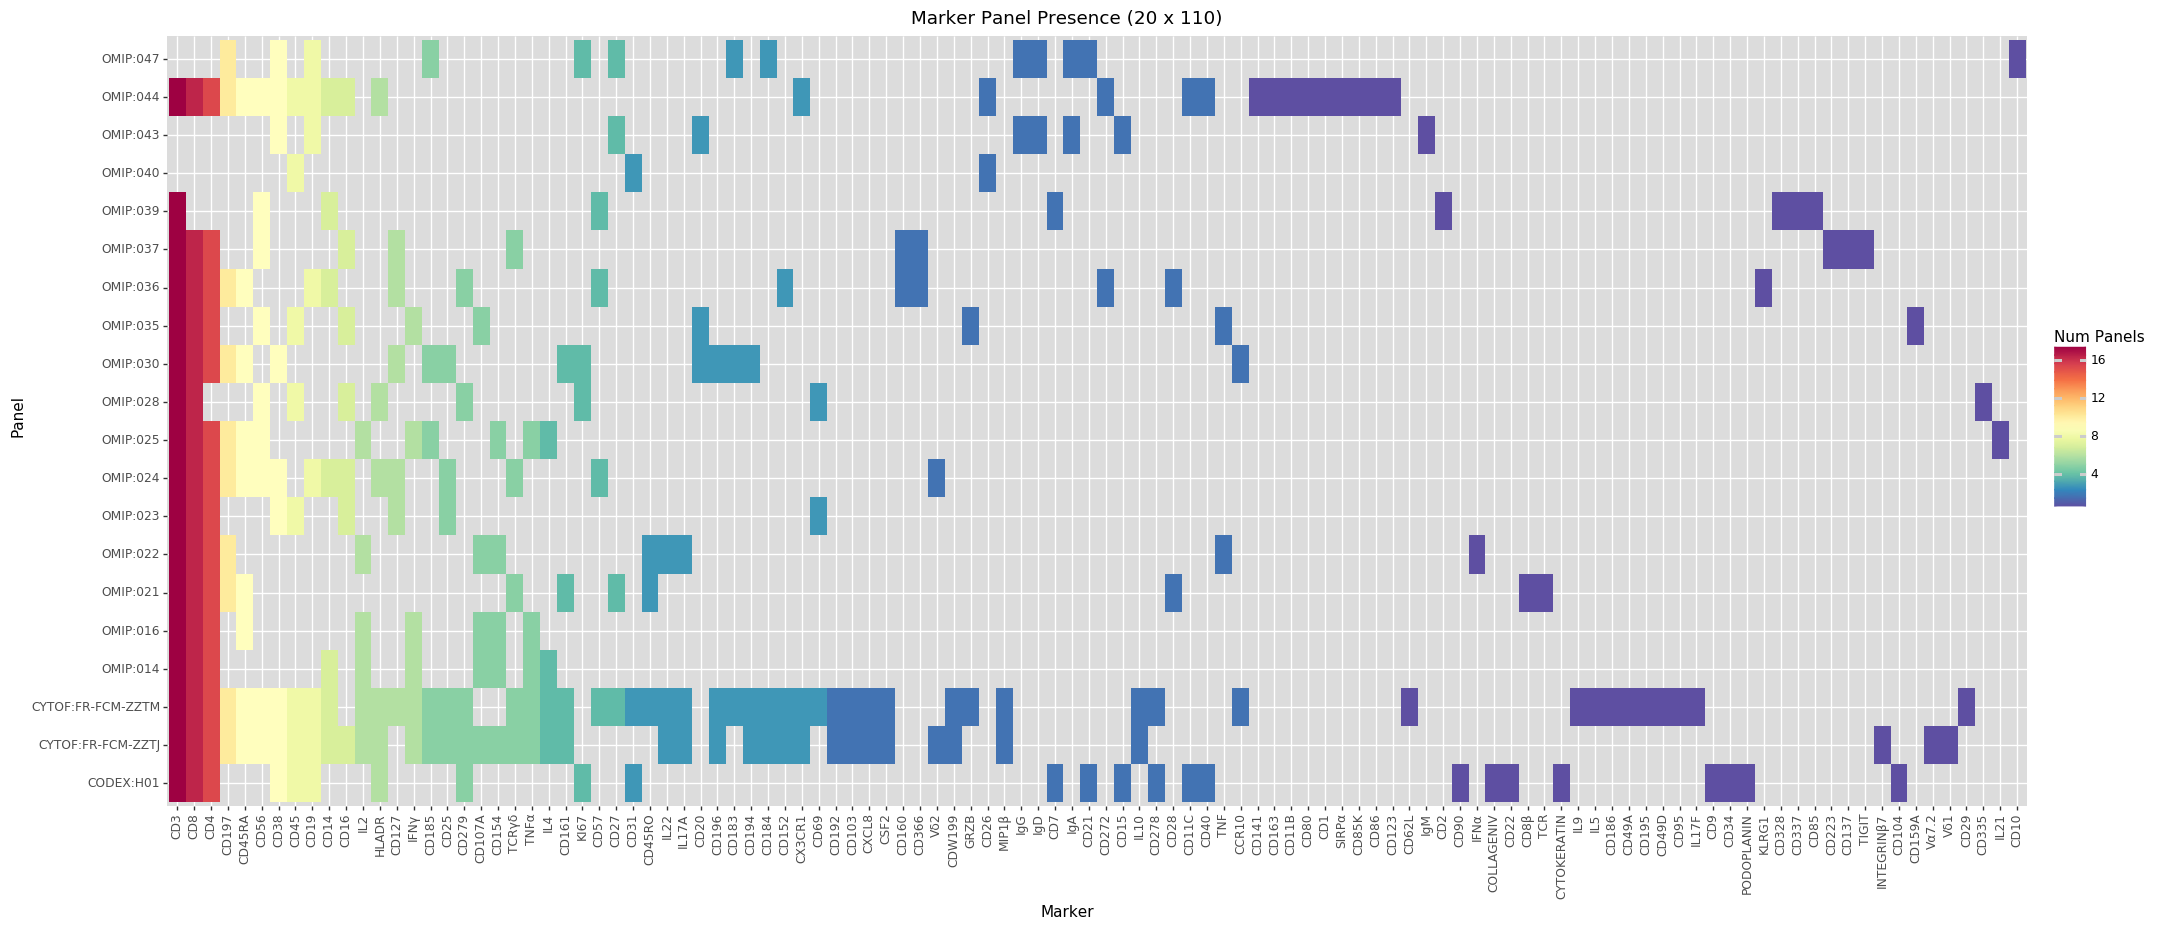

<ggplot: (308117512)>

In [169]:
(
    pn.ggplot(
        df_pl_hm.mul(df_pl_hm.sum(axis=1).values, axis=0).T
            .applymap(lambda v: v if v > 0 else np.nan)
            .stack().rename('count').reset_index()
            .assign(pr_value_lbl=lambda df: pd.Categorical(
                df['pr_value_lbl'], ordered=True,
                categories=df.sort_values('count', ascending=False)['pr_value_lbl'].unique()
            )),
        pn.aes(x='pr_value_lbl', y='panel', fill='count')
    ) + 
    pn.geom_tile(alpha=1) + 
    pn.labs(
        x='Marker', y='Panel', fill='Num Panels',
        title='Marker Panel Presence ({} x {})'.format(*df_pl_hm.shape[::-1])
    ) +
    pn.scale_fill_cmap('Spectral_r') +
    #pn.theme_bw() +
    pn.theme(
        figure_size=(24, 10),
        axis_text_x=pn.element_text(angle = 90, hjust = .5),
        panel_background=pn.element_rect(fill='#DCDCDC')
    ) 
)

## Top Candidates

In [173]:
df_pr = pd.read_csv(osp.join(DATA_DIR, 'pubmed_abstract_proteins_resolved.csv'))
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61175 entries, 0 to 61174
Data columns (total 8 columns):
id            61175 non-null int64
start         61175 non-null int64
end           61175 non-null int64
value         61175 non-null object
class         61175 non-null object
value_norm    61175 non-null object
value_lbl     61175 non-null object
value_sym     17228 non-null object
dtypes: int64(3), object(5)
memory usage: 3.7+ MB


In [172]:
df_pub = pd.read_csv(osp.join(DATA_DIR, 'pubmed_abstracts.csv'))
df_pub

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52174 entries, 0 to 52173
Data columns (total 5 columns):
abstract    46582 non-null object
date        18497 non-null object
id          52174 non-null int64
terms       52174 non-null object
title       52172 non-null object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [197]:
df_fr = pd.read_csv(osp.join(DATA_DIR, 'pubmed_annotated_proteins.csv'))
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
exp_id           347 non-null object
exp_name         347 non-null object
investigators    323 non-null object
researchers      323 non-null object
pr_value_lbl     347 non-null object
exp_lbl          347 non-null object
exp_typ          347 non-null object
dtypes: object(7)
memory usage: 19.1+ KB


In [235]:
df_pr[df_pr['value'].str.contains('RUNX')]['value'].value_counts()

RUNX3                                              7
Runt-related transcription factor (RUNX) family    1
Name: value, dtype: int64

In [236]:
df_pr[df_pr['value_lbl'].str.contains('RUNX')].head(10)

,id,start,end,value,class,value_norm,value_lbl,value_sym
852,29700302,587,592,Runx3,protein,RUNX3,RUNX3,NaN
858,29700302,951,956,Runx3,protein,RUNX3,RUNX3,NaN
859,29700302,980,985,Runx3,protein,RUNX3,RUNX3,NaN
1964,29211713,0,5,Runx3,protein,RUNX3,RUNX3,NaN
1968,29211713,667,672,Runx3,protein,RUNX3,RUNX3,NaN
1969,29211713,738,743,Runx3,protein,RUNX3,RUNX3,NaN
1970,29211713,1130,1135,Runx3,protein,RUNX3,RUNX3,NaN
1972,29211713,1380,1385,Runx3,protein,RUNX3,RUNX3,NaN
1974,29211713,1510,1515,Runx3,protein,RUNX3,RUNX3,NaN
10099,27082311,18,23,RUNX3,protein,RUNX3,RUNX3,NaN


In [237]:
df_fr[df_fr['pr_value_lbl'].str.contains('RUN')]['pr_value_lbl'].value_counts()

Series([], Name: pr_value_lbl, dtype: int64)

In [239]:
df_pub[df_pub['id'] == 29211713].iloc[0]['abstract']

'Tissue-resident memory CD8<sup>+</sup> T (T<sub>RM</sub>) cells are found at common sites of pathogen exposure, where they elicit rapid and robust protective immune responses. However, the molecular signals that control T<sub>RM</sub> cell differentiation and homeostasis are not fully understood. Here we show that mouse T<sub>RM</sub> precursor cells represent a unique CD8<sup>+</sup> T cell subset that is distinct from the precursors of circulating memory cell populations at the levels of gene expression and chromatin accessibility. Using computational and pooled in vivo RNA interference screens, we identify the transcription factor Runx3 as a key regulator of T<sub>RM</sub> cell differentiation and homeostasis. Runx3 was required to establish T<sub>RM</sub> cell populations in diverse tissue environments, and supported the expression of crucial tissue-residency genes while suppressing genes associated with tissue egress and recirculation. Furthermore, we show that human and mouse tu

In [225]:
pr_approved = {
    'TCRVγ9': 'The Vγ9 TCR is a variant of the TCR γ chain expressed on a subset of γ/δ T cells. Vγ9Vδ2 T lymphocytes, a major γ/δ T cell subset in humans, recognize phosphoantigens, certain tumor cells, and cells treated with aminobisphosphonates. This cell population displays cytolytic activity against various tumor cells.',
    # 'CD91': '', # Bad match to alias APR
    'CD94': 'CD94/NKG2 is a family of C-type lectin receptors which are expressed predominantly on the surface of NK cells and a subset of CD8+ T-lymphocyte.[1][2] These receptors stimulate or inhibit cytotoxic activity of NK cells, therefore they are divided into activating and inhibitory receptors according to their function',
    #'PGE2DC': '',
    'δTCS1': 'Can be a large portion of delta-gamma cells, "exhibit autoimmunological capacity" (https://link.springer.com/article/10.1007/BF01697621)',
    'EOMES': 'In cooperation with another T-box transcription factor, T-bet, EOMES induces production of IFN-γ and enhances cytotoxic activities of effector CD8+ T cells. EOMES has been shown to be required to maintain long-term memory of CD8+ T cells and is important for homeostasis of memory and effector T cells.',
    'CD40L': 'aka CD154 - CD154 acts as a costimulatory molecule and is particularly important on a subset of T cells called T follicular helper cells (TFH cells)',
    'CD277': 'Human Vγ9Vδ2 T cells kill a broad range of solid tumor and leukemia/lymphoma cells. In this issue of Blood, Harly et al demonstrate a pivotal role of CD277/butyrophilin-3 for the activation of γδ T cells.',
    'MR1': 'Non-classical MHC1 protein (what are related ligands?)',
    'CD1D': 'Non-classical MHC1 protein (alpha Galcer is a ligand)',
    'IL17C': 'Cytokine that plays a crucial role in innate immunity of the epithelium, including to intestinal bacterial pathogens, in an autocrine manner. Stimulates the production of antibacterial peptides and proinflammatory molecules for host defense by signaling through the NF-kappa-B and MAPK pathways',
    'CD294': 'CRTH2 is the most reliable marker for the detection of circulating human type 2 Th and type 2 T cytotoxic cells (pubmed 11069080)',
    'GLUT1': 'Guclose transporter protein found in plasma membrane or on surface - crucial for metabolism and activation - "In patients with T1D, high expression of GLUT1 was a hallmark of circulating Tscm" (pubmed 29506985)',
    'IL23': 'Debate continues to surround the role for IL-23 in the pathophysiology of inflammatory joint diseases (rheumatoid arthritis and spondyloarthritis). Ustekinumab, which inhibits IL-12 and IL-23 by blocking p40, has been found effective in cutaneous psoriasis and psoriatic arthritis, as well as in Crohns disease. Treatments that specifically target IL-23 (antibodies to p19) are being developed. (pubmed 21585245)',
    'PGD2': 'aka CRTH2: This is the prostaglandin that binds to CD294',
    'RUNX3': 'We identify the transcription factor Runx3 as a key regulator of TRM cell differentiation and homeostasis (pubmed 29211713)',
}

In [171]:
df_cand = df[df['panel_name_ct'] < 1].sort_values('pm_max_rel', ascending=False).copy()
df_cand.head(50)

,pr_value_lbl,pm_max_rel,panel_names,cell_types,panel_name_ct,cell_type_ct
2421,TCRVγ9,0.621071,NaN,γδT-Vγ9,0,1
1723,Vγ2Vδ2,0.548075,NaN,γδT-17,0,1
3484,25OHVD,0.523636,NaN,TFH17LIKE|TFH1LIKE,0,2
2767,CD91,0.349091,NaN,TFH17LIKE|TFH1LIKE,0,2
428,PGE2DC,0.341635,NaN,TFH0LIKE,0,1
1780,δTCS1,0.334953,NaN,γδT-TCS1,0,1
878,INKT,0.265738,NaN,γδT-Vγ9Vδ2,0,1
1555,TET,0.225675,NaN,TSCM,0,1
2766,CD94,0.212591,NaN,γδT-Vγ9Vδ2,0,1
193,NPAG,0.206416,NaN,TFH2LIKE,0,1


In [231]:
df_cand[df_cand['pr_value_lbl'].isin(pr_approved.keys())][['pr_value_lbl', 'cell_types', 'pm_max_rel']]\
    .rename(columns={'pr_value_lbl': 'Protein', 'cell_types': 'Related Subtypes', 'pm_max_rel': 'Score'})\
    .reset_index(drop=True)

,Protein,Related Subtypes,Score
0,TCRVγ9,γδT-Vγ9,0.621071
1,δTCS1,γδT-TCS1,0.334953
2,CD94,γδT-Vγ9Vδ2,0.212591
3,GLUT1,TSCM,0.169256
4,MR1,MAIT,0.153004
5,EOMES,TC9,0.129671
6,PGD2,TC2,0.122524
7,RUNX3,TRM,0.113590
8,CD277,γδT-Vγ9,0.103512
9,IL17C,TC17,0.100487
